In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
df= pd.read_csv('/content/final_nasdaq_data.csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,cik,calendarYear,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,minorityInterest,totalInvestments,totalDebt,netDebt,Close
0,0,MMM,66740,2023,-6979000000,1987000000,-3855000000,274000000,317000000,-170000000,...,37479000000,-6.778000e+09,-25903000000,4807000000,4868000000,61000000,297000000,16854000000,10921000000,78.461540
1,1,MMM,66740,2022,5791000000,1831000000,-663000000,263000000,-670000000,-105000000,...,47950000000,-6.673000e+09,-26516000000,14770000000,14818000000,48000000,1205000000,16200000000,12545000000,96.362877
2,2,MMM,66740,2021,5929000000,1915000000,-166000000,274000000,-751000000,-122000000,...,45821000000,-6.750000e+09,-23963000000,15117000000,15188000000,71000000,463000000,17626000000,13062000000,136.822739
3,3,MMM,66740,2020,5388000000,1911000000,-165000000,262000000,458000000,165000000,...,43761000000,-7.661000e+09,-23178000000,12931000000,12995000000,64000000,618000000,19051000000,14417000000,148.076920
4,4,MMM,66740,2019,4582000000,1593000000,-273000000,278000000,803000000,345000000,...,42135000000,-8.139000e+09,-23879000000,10126000000,10189000000,63000000,294000000,20560000000,18207000000,136.195648


In [ ]:
print(df.isnull().sum())

Unnamed: 0          0
symbol              0
cik                 0
calendarYear        0
netIncome           0
                   ..
minorityInterest    0
totalInvestments    0
totalDebt           0
netDebt             0
Close               0
Length: 98, dtype: int64


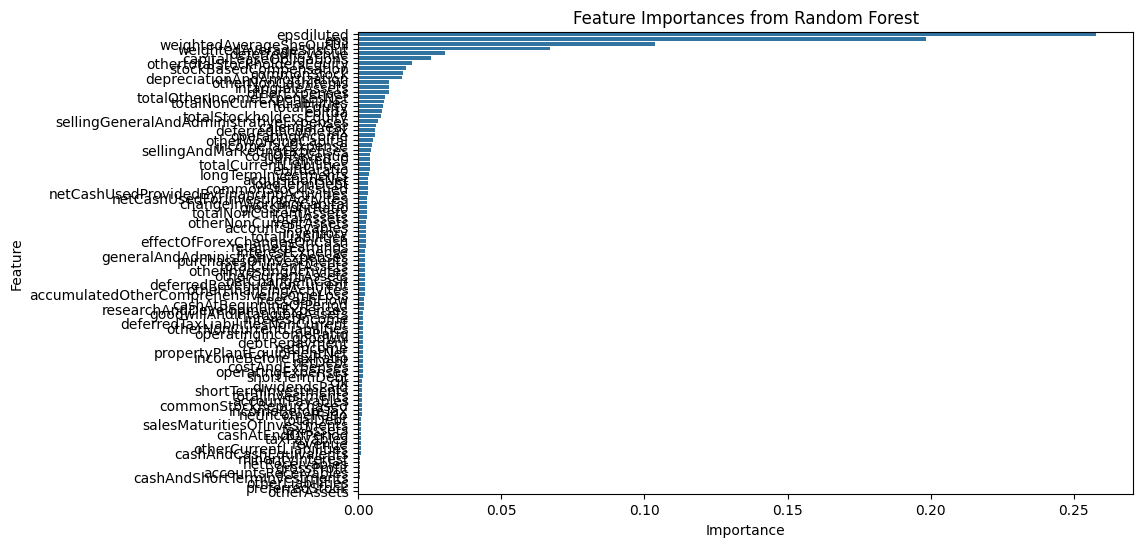

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['Close','symbol'])
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features = features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importances from Random Forest')
plt.show()


<ipython-input-11-ef54ea73e76c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Cumulative Importance'] = top_features['Importance'].cumsum()


                                    Feature  Importance  Cumulative Importance
52                               epsdiluted    0.257994               0.257994
51                                      eps    0.198428               0.456422
54                 weightedAverageShsOutDil    0.103631               0.560054
53                    weightedAverageShsOut    0.066872               0.626926
74                          deferredRevenue    0.030183               0.657109
83                  capitalLeaseObligations    0.025424               0.682533
89             othertotalStockholdersEquity    0.018691               0.701223
6                    stockBasedCompensation    0.016658               0.717881
86                              commonStock    0.015591               0.733472
4               depreciationAndAmortization    0.015269               0.748741
12                        otherNonCashItems    0.010803               0.759544
63                         intangibleAssets    0.010

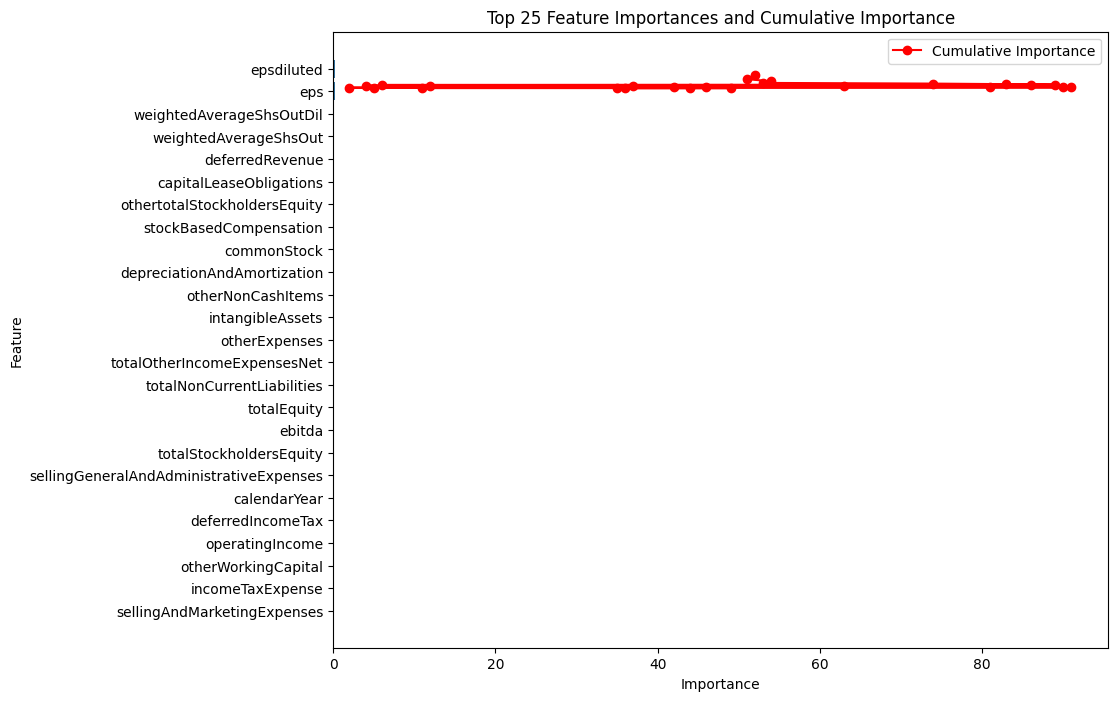

In [ ]:
top_features = features.head(25)
top_features['Cumulative Importance'] = top_features['Importance'].cumsum()
print(top_features)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.plot(top_features['Cumulative Importance'], marker='o', color='r', label='Cumulative Importance')
plt.legend()
plt.title('Top 25 Feature Importances and Cumulative Importance')
plt.show()


In [ ]:

top_feature_names = top_features['Feature']

data = df[top_feature_names]


In [ ]:
data['Close'] = df['Close']


<ipython-input-14-c435bbce3d1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = df['Close']


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostRegressor

X = data.drop(columns=['Close'])
y = data['Close']

model = CatBoostRegressor(verbose=0)

predicted_close = cross_val_predict(model, X, y, cv=5)
data['predicted_Close'] = predicted_close
mean_percentage_error = np.mean(np.abs((data['Close'] - data['predicted_Close']) / data['Close']) * 100)
print("Mean Percentage Error:", mean_percentage_error)




Mean Percentage Error: 60.23483355359058


<ipython-input-20-3d9690325259>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_Close'] = predicted_close


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
import numpy as np

X = data.drop(columns=['Close'])
y = data['Close']

models = {
    'CatBoost': CatBoostRegressor(verbose=0),
    'AdaBoost': AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LightGBM': LGBMRegressor()
}

predictions = {}
for name, model in models.items():
    predictions[name] = cross_val_predict(model, X, y, cv=5)

avg_predictions = np.mean(np.column_stack(list(predictions.values())), axis=1)

data['predicted_Close'] = avg_predictions

mean_percentage_error = np.mean(np.abs((data['Close'] - data['predicted_Close']) / data['Close']) * 100)

print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6290
[LightGBM] [Info] Number of data points in the train set: 965, number of used features: 26
[LightGBM] [Info] Start training from score 169.673994
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6280
[LightGBM] [Info] Number of data points in the train set: 965, number of used features: 26
[LightGBM] [Info] Start training from score 147.988203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6279
[LightGBM] [Info] Number of data points in the train set

<ipython-input-18-980d45e4a0fd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_Close'] = avg_predictions


In [ ]:
from google.colab import files

# Assuming 'data' is your DataFrame with predictions and actual 'Close' values
data.to_csv('predicted_close_data.csv', index=False)

# Download the CSV file to your local machine
files.download('predicted_close_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>